In [1]:
# Thamys Abrahao - 06/2018
import pandas as pd
import json
import numpy as np
import glob
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(rc={'figure.figsize':(7.7,7.7)}) # graph size

In [2]:
files_list_original = []

for name in glob.glob('*.json'):
    files_list_original.append(name)
    
print(files_list_original)    

['questions.json', 'students.json', 'sessions.json', 'premium_payments.json', 'answers.json', 'textBookSolutionViews.json', 'subjects.json', 'premium_cancellations.json', 'fileViews.json', 'evaluations.json', 'studyPlanViews.json']


In [3]:
files_list_student = files_list_original 
files_list_student

['questions.json',
 'students.json',
 'sessions.json',
 'premium_payments.json',
 'answers.json',
 'textBookSolutionViews.json',
 'subjects.json',
 'premium_cancellations.json',
 'fileViews.json',
 'evaluations.json',
 'studyPlanViews.json']

In [4]:
# abrindo os arquivos e colocando o conteúdo de cada um em um df diferente

df_list = []

for file_name in files_list_student:
    col_name = file_name.split('.')[0]
    #print(col_name)
    with open(file_name, 'r') as f:
        data = json.load(f)
        
    var_name = 'df_{}'.format(col_name)
    print '***********************************************'
    print(var_name)
    globals()[var_name] = pd.DataFrame(data)
    df_list.append(globals()[var_name])
    print(globals()[var_name].head())
    print '********** cleaning empty values **************'
    globals()[var_name].replace('', np.nan, inplace=True)
    print '***************** final df ********************'
    print(globals()[var_name].head())
    print '***********************************************'
    

***********************************************
df_questions
                 QuestionDate  \
0  2013-09-04 14:09:25.963000   
1  2013-09-04 15:36:51.083000   
2  2013-10-30 19:41:43.137000   
3  2013-10-30 19:19:15.517000   
4  2013-10-30 19:38:06.420000   

                                     QuestionSnippet StudentClient  StudentId  
0  O que é mais importante para um projeto: escop...           NaN   12970655  
1  Você pode ter um negócio/produto bem sucedido ...           NaN   12970655  
2  Custos com consultoria para planejar um projet...           NaN   12970655  
3  CAPEX: investimento em consultoria entra como ...           NaN   12970655  
4  Custos com consultoria para planejar um projet...           NaN   12970655  
********** cleaning empty values **************
***************** final df ********************
                 QuestionDate  \
0  2013-09-04 14:09:25.963000   
1  2013-09-04 15:36:51.083000   
2  2013-10-30 19:41:43.137000   
3  2013-10-30 19:19:15.517000   

***********************************************
df_premium_cancellations
             CancellationDate  StudentId
0  2016-05-05 19:08:31.937000   34129668
1  2016-05-05 22:48:20.830000   34129668
2  2016-05-20 22:37:21.117000   82394932
3  2016-05-31 13:44:55.307000   82942835
4  2016-06-01 14:22:19.467000   85382416
********** cleaning empty values **************
***************** final df ********************
             CancellationDate  StudentId
0  2016-05-05 19:08:31.937000   34129668
1  2016-05-05 22:48:20.830000   34129668
2  2016-05-20 22:37:21.117000   82394932
3  2016-05-31 13:44:55.307000   82942835
4  2016-06-01 14:22:19.467000   85382416
***********************************************
***********************************************
df_fileViews
                                            FileName  StudentId Studentclient  \
0  Exercicios Resolvidos do Halliday sobre Rotaçã...   12970655       Website   
1  Exercicios Resolvidos do Halliday sobre Rotaçã...   12970655     

In [5]:
def df_info_visualization(df):
    '''
    Funcao para plotar o percentual de preenchimento das variáveis do df
    '''
    
    column_ = []
    total_ = []

    for column in df.columns:
        perc = (float(df[column].count())/len(df))*100
        column_.append(column)
        total_.append(perc)

    df_graph = pd.DataFrame(total_, column_).reset_index()
    df_graph.columns = ['variavel', 'info']
    df_graph = df_graph.sort_values(by='info', ascending=True)
    
    graph_ = sns.barplot(x='variavel', y='info', 
                         data=df_graph, palette='Paired')
    
    for tick in graph_.get_xticklabels():
        tick.set_rotation(90)

    graph_.xaxis.set_tick_params(labelsize=15)    
    graph_.yaxis.set_tick_params(labelsize=15)    

    plt.xlabel('', fontweight='bold', fontsize=20)
    plt.ylabel('Percentual de info. (%)',fontweight='bold', fontsize=20)
    plt.tight_layout()
    
    return plt.show()
    

(7522, 4)


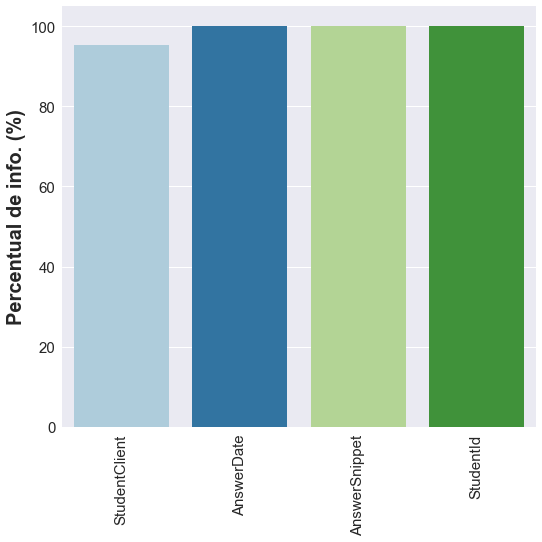

In [6]:
# conhecendo a informação de cada um dos arquivos
print(df_answers.shape)
df_info_visualization(df_answers)
#plt.savefig('teste.png')

(106889, 4)


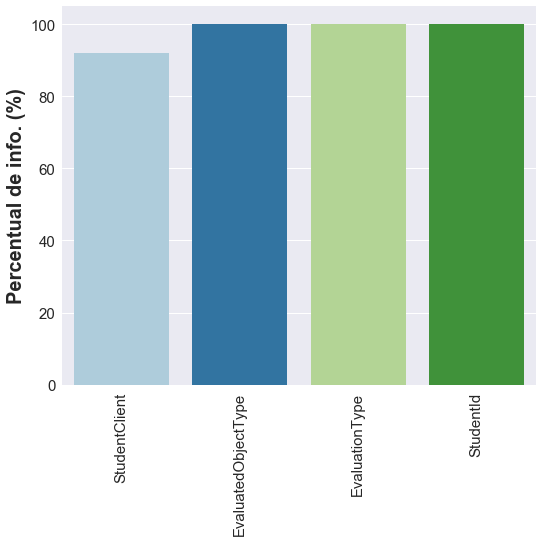

In [7]:
print(df_evaluations.shape)
df_info_visualization(df_evaluations)

(3028983, 4)


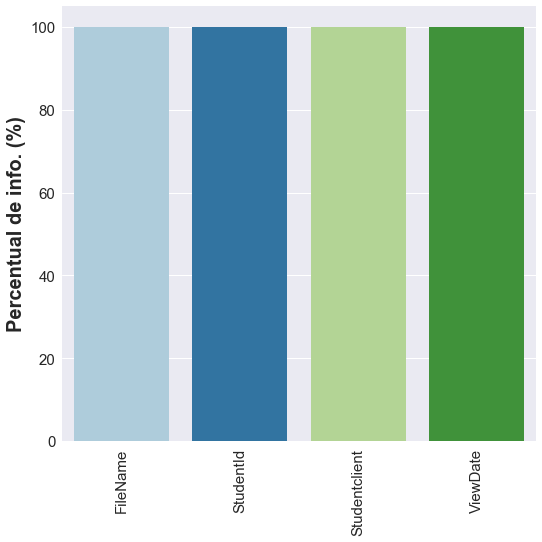

,FileName,StudentId,Studentclient,ViewDate
3028978,Gestão de Conhecimento Atividade Diagnóstica 0...,69759595,Android | 6.0.1 | sdk 23,2018-04-26 00:17:17.000000
3028979,Gestão do Conhecimento Atividade de Aprendizag...,69759595,Android | 6.0.1 | sdk 23,2018-04-25 22:57:28.000000
3028980,Gestão do Conhecimento Atividade de Aprendizag...,69759595,Android | 6.0.1 | sdk 23,2018-04-25 22:57:50.000000
3028981,Avaliação de Proficiência Questões de estudo 01,69759595,Android | 6.0.1 | sdk 23,2018-05-13 19:39:21.000000
3028982,20180518_183049.jpg,69759595,Android | 6.0.1 | sdk 23,2018-05-20 18:31:31.000000


In [8]:
print(df_fileViews.shape)
df_info_visualization(df_fileViews)
df_fileViews.tail()

(844, 2)


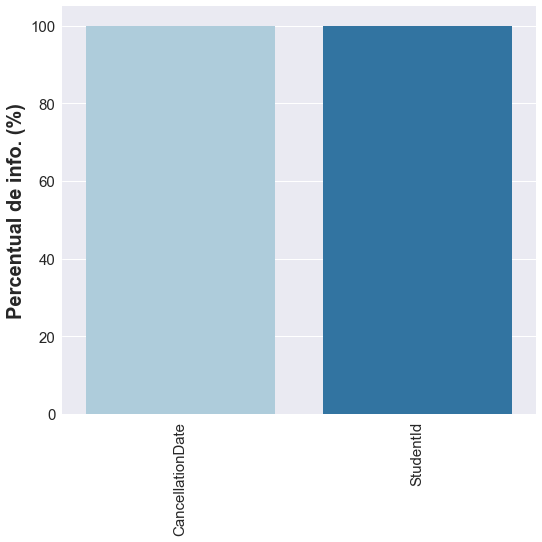

In [9]:
print(df_premium_cancellations.shape)
df_info_visualization(df_premium_cancellations)

(7276, 3)


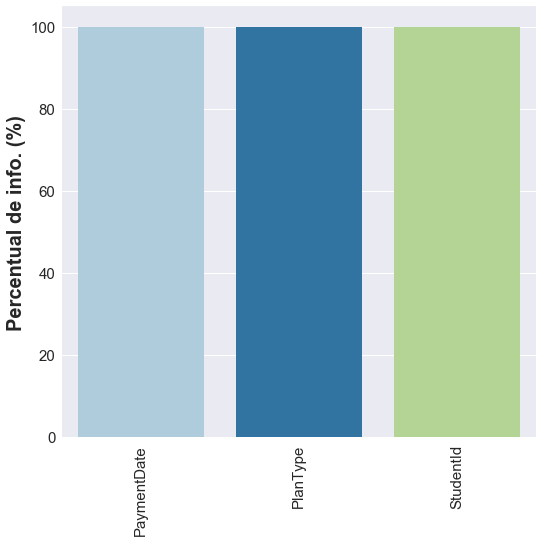

In [10]:
print(df_premium_payments.shape)
df_info_visualization(df_premium_payments)

(3906, 4)


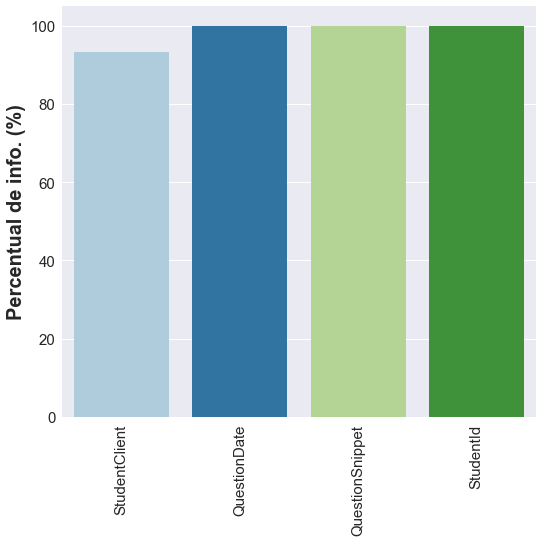

In [11]:
print(df_questions.shape)
df_info_visualization(df_questions)

(1399062, 3)


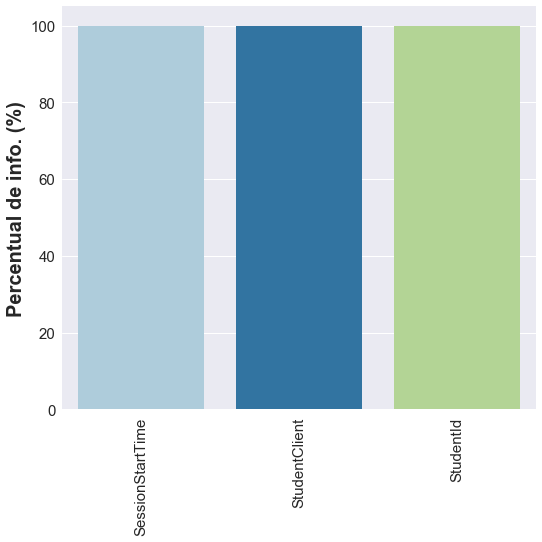

In [12]:
print(df_sessions.shape)
df_info_visualization(df_sessions)

(60000, 8)


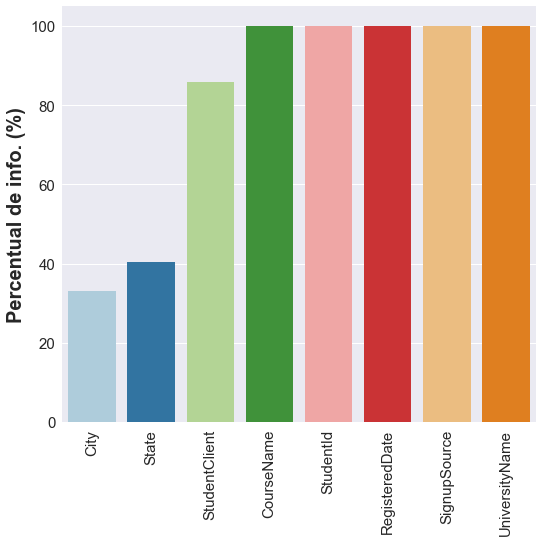

In [13]:
df_students.rename(columns={'Id':'StudentId'}, inplace=True)
print(df_students.shape)
df_info_visualization(df_students)

(7749, 4)


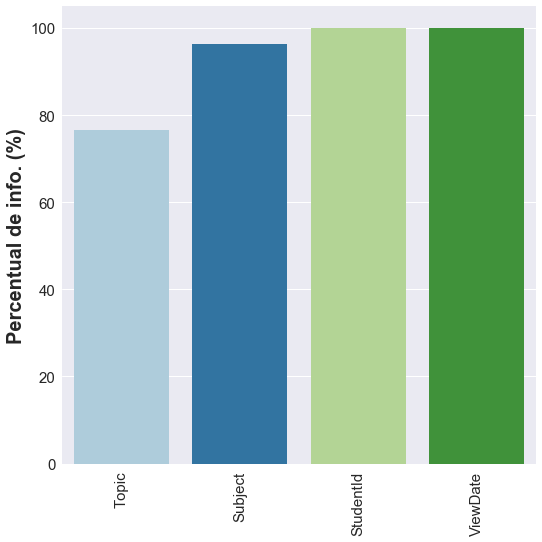

In [14]:
print(df_studyPlanViews.shape)
df_info_visualization(df_studyPlanViews)

(315766, 3)


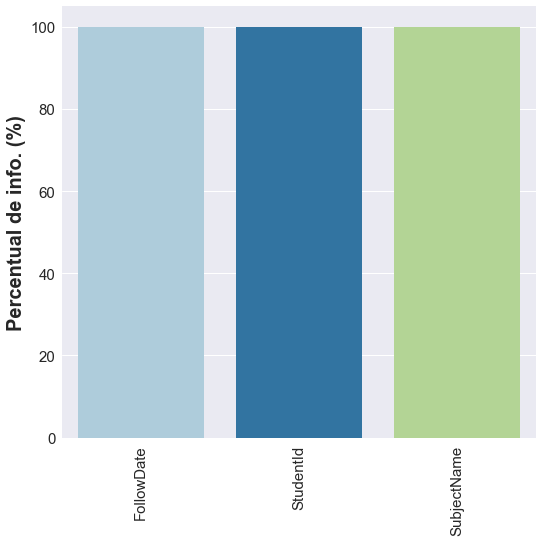

In [15]:
print(df_subjects.shape)
df_info_visualization(df_subjects)

(23088, 3)


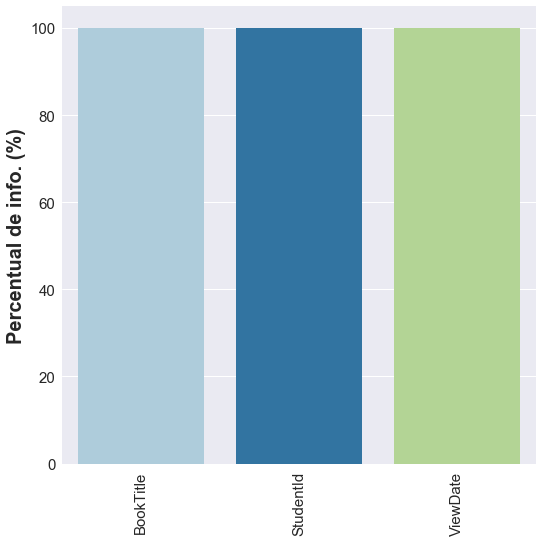

In [16]:
print(df_textBookSolutionViews.shape)
df_info_visualization(df_textBookSolutionViews)

# Montando a base com os pagantes

In [17]:
print(df_students.shape)
print(len(df_students['StudentId'].drop_duplicates().dropna()))
df_students.head()

(60000, 8)
60000


,City,CourseName,StudentId,RegisteredDate,SignupSource,State,StudentClient,UniversityName
0,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO
1,Rio de Janeiro,Direito do Trabalho e Segurança Social,59873654,2012-09-03 20:32:04.853000,Facebook,Rio de Janeiro,NaN,UFF
2,NaN,Enfermagem,3664695,2012-09-10 20:26:30.253000,Facebook,Distrito Federal,NaN,UNB
3,Resende,Engenharia de Produção Mecânica,15207697,2012-09-05 15:31:08.090000,Facebook,Rio de Janeiro,NaN,UERJ
4,NaN,Engenharia Elétrica,36988693,2012-10-15 21:34:51.143000,Facebook,NaN,NaN,UFU


In [18]:
print(df_premium_payments.shape)
print(len(df_premium_payments['StudentId'].drop_duplicates().dropna()))
df_premium_payments.head()

(7276, 3)
1983


,PaymentDate,PlanType,StudentId
0,2017-05-26 22:25:03.000000,Anual,12970655
1,2018-05-26 10:05:28.000000,Anual,12970655
2,2016-07-21 19:57:57.717000,Mensal,12970655
3,2016-08-21 08:47:42.947000,Mensal,12970655
4,2016-09-21 08:54:06.270000,Mensal,12970655


In [19]:
df_premium_payments[df_premium_payments.StudentId == 12970655]

,PaymentDate,PlanType,StudentId
0,2017-05-26 22:25:03.000000,Anual,12970655
1,2018-05-26 10:05:28.000000,Anual,12970655
2,2016-07-21 19:57:57.717000,Mensal,12970655
3,2016-08-21 08:47:42.947000,Mensal,12970655
4,2016-09-21 08:54:06.270000,Mensal,12970655
5,2016-10-21 07:15:22.177000,Mensal,12970655
6,2016-11-21 07:32:08.743000,Mensal,12970655
7,2016-12-21 10:09:27.583000,Mensal,12970655
8,2017-01-21 07:36:03.020000,Mensal,12970655
9,2017-02-21 08:16:47.740000,Mensal,12970655


Arrumando a base de pagantes para ter apenas um ID na base com a primeira data do pagamento

In [20]:
df_premium_payments_unique = (df_premium_payments.groupby('StudentId')
                              .first().reset_index())

In [21]:
print(df_premium_payments_unique.shape)

(1983, 3)


In [22]:
df_premium_payments_unique.head()

,StudentId,PaymentDate,PlanType
0,43621,2018-03-05 19:43:13.000000,Mensal
1,51498,2017-03-11 12:08:03.170000,Mensal
2,105540,2018-04-26 22:35:36.000000,Anual
3,258634,2018-02-04 23:43:22.808863,Mensal
4,311572,2018-05-02 00:30:25.000000,Mensal


In [23]:
df_premium_payments_unique[df_premium_payments_unique.StudentId == 12970655]

,StudentId,PaymentDate,PlanType
268,12970655,2017-05-26 22:25:03.000000,Anual


In [24]:
df_pagantes = pd.merge(df_students, df_premium_payments, how='outer',
                       on='StudentId', indicator=True)

In [25]:
df_pagantes.head(15)

,City,CourseName,StudentId,RegisteredDate,SignupSource,State,StudentClient,UniversityName,PaymentDate,PlanType,_merge
0,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO,2017-05-26 22:25:03.000000,Anual,both
1,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO,2018-05-26 10:05:28.000000,Anual,both
2,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO,2016-07-21 19:57:57.717000,Mensal,both
3,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO,2016-08-21 08:47:42.947000,Mensal,both
4,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO,2016-09-21 08:54:06.270000,Mensal,both
5,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO,2016-10-21 07:15:22.177000,Mensal,both
6,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO,2016-11-21 07:32:08.743000,Mensal,both
7,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO,2016-12-21 10:09:27.583000,Mensal,both
8,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO,2017-01-21 07:36:03.020000,Mensal,both
9,NaN,Administração,12970655,2012-05-29 15:22:27.490000,Email,Rio de Janeiro,NaN,PUC-RIO,2017-02-21 08:16:47.740000,Mensal,both


In [26]:
df_pagantes['_merge'].value_counts()

left_only     58017
both           7276
right_only        0
Name: _merge, dtype: int64

In [27]:
df_pagantes.rename(columns={'_merge':'Pagantes'}, inplace=True)

In [28]:
df_pagantes['Pagantes'].replace('left_only', np.nan, inplace=True)


In [29]:
df_pagantes['Pagantes'].replace('both', 1, inplace=True)

In [30]:
df_pagantes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65293 entries, 0 to 65292
Data columns (total 11 columns):
City              22114 non-null object
CourseName        65293 non-null object
StudentId         65293 non-null int64
RegisteredDate    65293 non-null object
SignupSource      65293 non-null object
State             27968 non-null object
StudentClient     55633 non-null object
UniversityName    65293 non-null object
PaymentDate       7276 non-null object
PlanType          7276 non-null object
Pagantes          7276 non-null float64
dtypes: float64(1), int64(1), object(9)
memory usage: 6.0+ MB


In [31]:
# quantos ids unicos?
len(df_pagantes['StudentId'].drop_duplicates().dropna())

60000

In [32]:
df_pagantes.groupby(['Pagantes'])['StudentId'].count()

Pagantes
1.0    7276
Name: StudentId, dtype: int64

In [33]:
print(len(df_premium_cancellations['StudentId'].drop_duplicates().dropna()))
df_premium_cancellations.head()

768


,CancellationDate,StudentId
0,2016-05-05 19:08:31.937000,34129668
1,2016-05-05 22:48:20.830000,34129668
2,2016-05-20 22:37:21.117000,82394932
3,2016-05-31 13:44:55.307000,82942835
4,2016-06-01 14:22:19.467000,85382416
